In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving student_monnitoring_data.csv to student_monnitoring_data (1).csv


In [ ]:
df = pd.read_csv('student_monnitoring_data.csv')

In [ ]:
df.head(5)

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          15000 non-null  int64  
 1   Date                15000 non-null  object 
 2   Class Time          15000 non-null  object 
 3   Attendance Status   15000 non-null  object 
 4   Stress Level (GSR)  15000 non-null  float64
 5   Sleep Hours         15000 non-null  float64
 6   Anxiety Level       15000 non-null  int64  
 7   Mood Score          15000 non-null  int64  
 8   Risk Level          15000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,Student ID,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score
count,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000
mean,250.50000,2.762538,6.996780,5.546867,5.471533
std,144.34209,1.301927,1.150973,2.870323,2.868984
min,1.00000,0.500000,5.000000,1.000000,1.000000
25%,125.75000,1.640000,6.000000,3.000000,3.000000
50%,250.50000,2.760000,7.000000,6.000000,5.000000
75%,375.25000,3.900000,8.000000,8.000000,8.000000
max,500.00000,5.000000,9.000000,10.000000,10.000000


In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
Student ID,0
Date,0
Class Time,0
Attendance Status,0
Stress Level (GSR),0
Sleep Hours,0
Anxiety Level,0
Mood Score,0
Risk Level,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == "object":
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str)).astype(int)
df = df.astype({col: 'int' for col in df.select_dtypes(include='object').columns})


Date
Class Time
Attendance Status
Risk Level


In [ ]:
df.head(10)

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,0,18,1,0.92,7.6,6,6,1
1,1,1,14,1,1.17,6.0,6,2,2
2,1,2,7,1,4.56,6.3,4,8,0
3,1,3,9,1,3.07,9.0,2,10,1
4,1,4,16,0,3.93,7.4,9,4,0
5,1,5,12,2,4.96,6.6,5,9,0
6,1,6,8,0,2.93,6.8,4,5,0
7,1,7,13,0,2.17,8.4,9,9,0
8,1,8,6,0,4.40,5.9,4,4,0
9,1,9,19,1,1.44,7.7,3,7,1


In [ ]:
# Convert 'Date' column back to datetime format if it's encoded
start_date = "2024-12-01"  # Replace with the actual start date
df['Date'] = pd.to_datetime(start_date) + pd.to_timedelta(df['Date'], unit='D')

# Convert 'Date' into elapsed days since the start
df['Elapsed_Days'] = (df['Date'] - df['Date'].min()).dt.days

# Drop the original 'Date' column if not needed
df = df.drop(columns=['Date'])

# Preview the updated DataFrame
print(df.head())


   Student ID  Class Time  Attendance Status  Stress Level (GSR)  Sleep Hours  \
0           1          18                  1                0.92          7.6   
1           1          14                  1                1.17          6.0   
2           1           7                  1                4.56          6.3   
3           1           9                  1                3.07          9.0   
4           1          16                  0                3.93          7.4   

   Anxiety Level  Mood Score  Risk Level  Elapsed_Days  
0              6           6           1             0  
1              6           2           2             1  
2              4           8           0             2  
3              2          10           1             3  
4              9           4           0             4  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          15000 non-null  int64  
 1   Class Time          15000 non-null  int64  
 2   Attendance Status   15000 non-null  int64  
 3   Stress Level (GSR)  15000 non-null  float64
 4   Sleep Hours         15000 non-null  float64
 5   Anxiety Level       15000 non-null  int64  
 6   Mood Score          15000 non-null  int64  
 7   Risk Level          15000 non-null  int64  
 8   Elapsed_Days        15000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X = df.drop(columns=['Attendance Status'])
y = df['Attendance Status']
# Normalizing features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Results dictionary to store performance metrics for each model
results = {
    'Regression Tree': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Ridge Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Lasso Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Principal Component Regression (PCR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Regression Splines': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Support Vector Regression (SVR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []}
}

num_features = X.shape[1]

# Running the models multiple times to compute average metrics
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=None)

    # Defining models
    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression (SVR)': SVR()
    }

    # Fitting models and computing metrics
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        results[model_name]['MSE'].append(mse)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['RSE'].append(rse)
        results[model_name]['RSS'].append(rss)
        results[model_name]['R^2'].append(r2)

# Calculating average results
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(average_results).T
results_df


,MSE,RMSE,RSE,RSS,R^2
Regression Tree,0.671100,0.819165,0.819985,3019.950000,-0.009222
Ridge Regression,0.433224,0.658184,0.658844,1949.508599,0.348533
Lasso Regression,0.665206,0.815594,0.816411,2993.429212,-0.000269
Principal Component Regression (PCR),0.433224,0.658184,0.658844,1949.508956,0.348533
Regression Splines,0.360350,0.600282,0.600883,1621.573019,0.458123
Support Vector Regression (SVR),0.390027,0.624502,0.625127,1755.120547,0.413501


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 1}
Ridge Regression - Metrics: {'MSE': 0.42884536491967373, 'RMSE': 0.6548628596276275, 'RSE': 0.655518706421572, 'RSS': 1929.804142138532, 'R²': 0.3609090510627433}



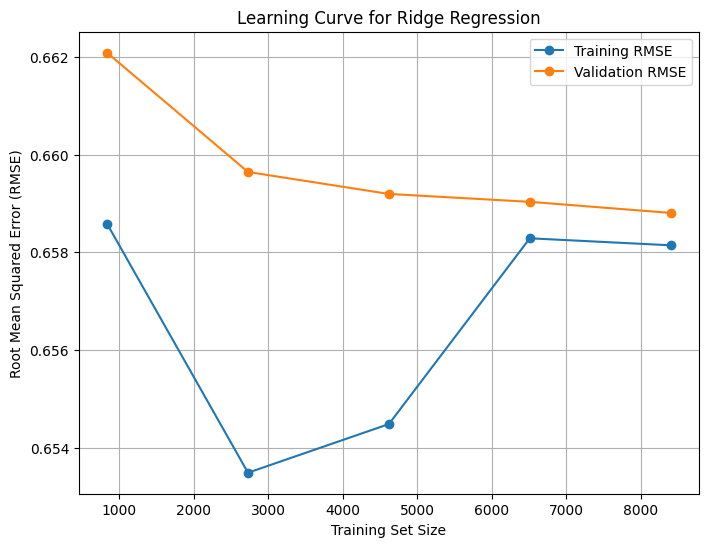

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 0.43018715390891343, 'RMSE': 0.655886540423657, 'RSE': 0.6565434124364823, 'RSS': 1935.8421925901105, 'R²': 0.3589094370560316}



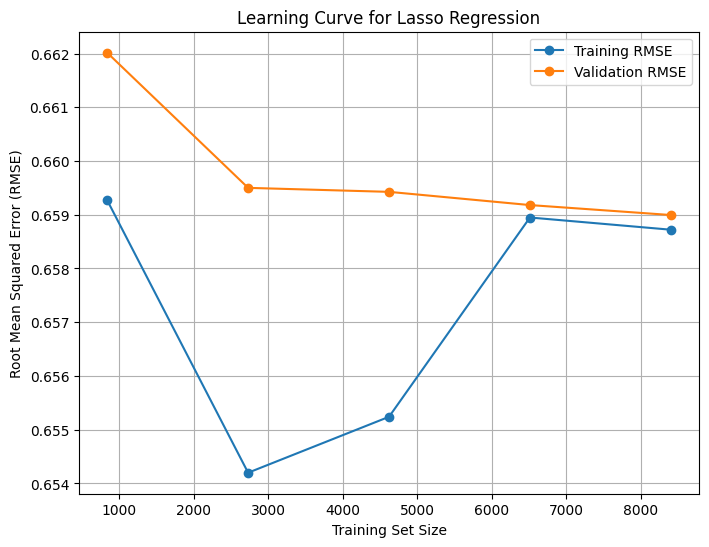

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 8}
Principal Component Regression (PCR) - Metrics: {'MSE': 0.428842690782369, 'RMSE': 0.6548608178707663, 'RSE': 0.6555166626198861, 'RSS': 1929.7921085206603, 'R²': 0.36091303622170157}



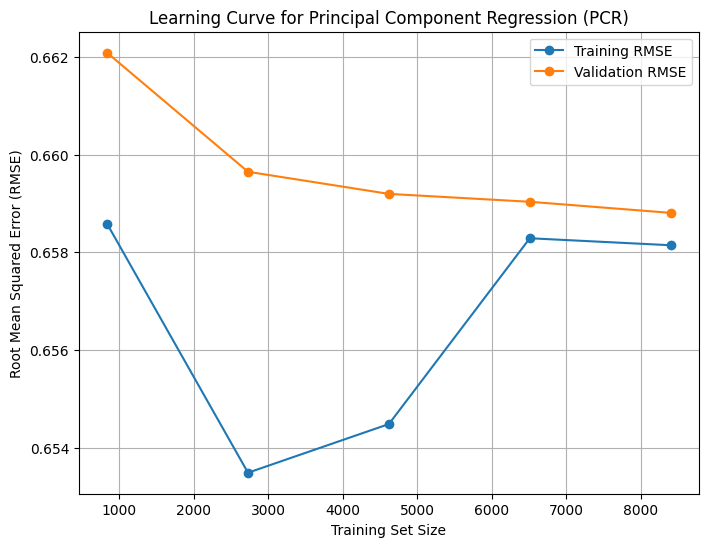

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 3}
Regression Splines - Metrics: {'MSE': 0.35694157861605746, 'RMSE': 0.5974458792359836, 'RSE': 0.5980442227802717, 'RSS': 1606.2371037722587, 'R²': 0.4680643633967526}



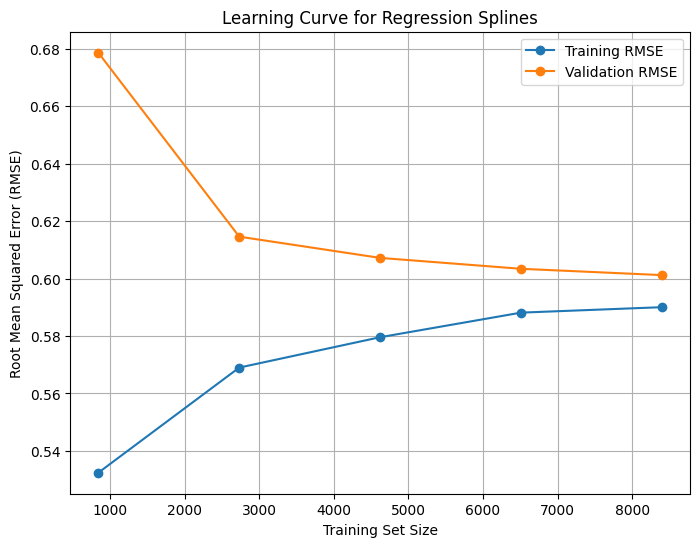

Running GridSearchCV for Regression Tree...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}
Regression Tree - Metrics: {'MSE': 0.3327185251462757, 'RMSE': 0.5768175839433778, 'RSE': 0.5773952681982691, 'RSS': 1497.2333631582405, 'R²': 0.5041630028936734}



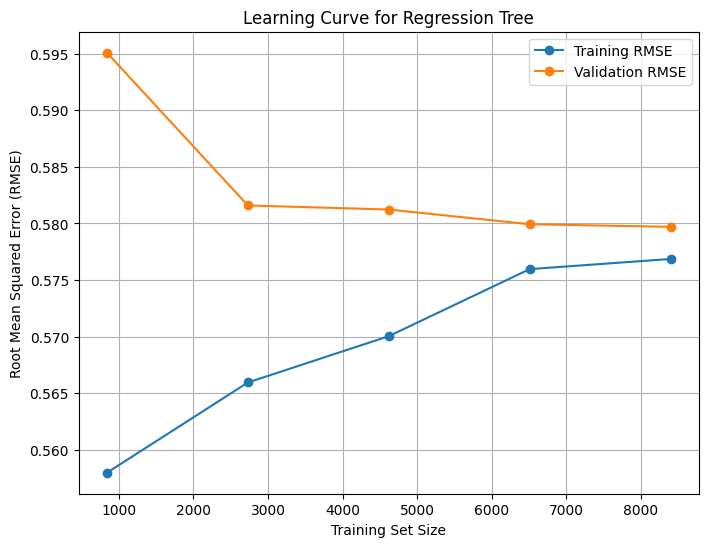

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.5}
Support Vector Regression (SVR) - Metrics: {'MSE': 0.3792013927523972, 'RMSE': 0.6157933035949622, 'RSE': 0.6164100221306947, 'RSS': 1706.4062673857875, 'R²': 0.43489146028696857}



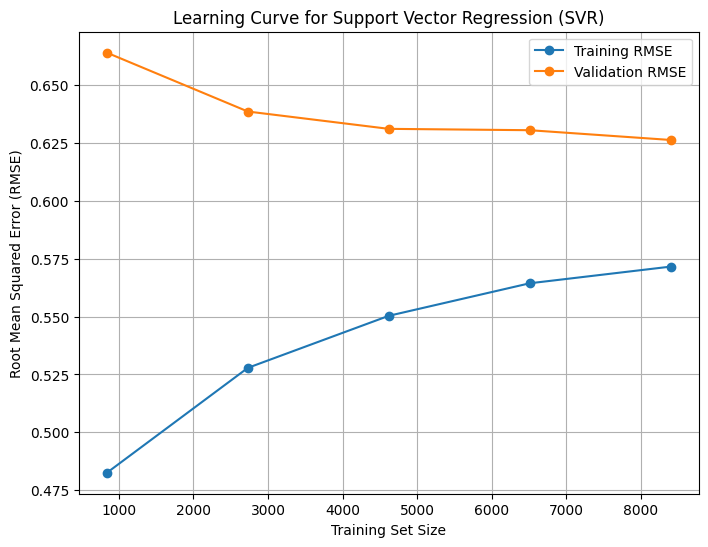


Model Performance Metrics:
                                           MSE      RMSE       RSE  \
Ridge Regression                      0.428845  0.654863  0.655519   
Lasso Regression                      0.430187  0.655887  0.656543   
Principal Component Regression (PCR)  0.428843  0.654861  0.655517   
Regression Splines                    0.356942  0.597446  0.598044   
Regression Tree                       0.332719  0.576818  0.577395   
Support Vector Regression (SVR)       0.379201  0.615793  0.616410   

                                              RSS        R²  
Ridge Regression                      1929.804142  0.360909  
Lasso Regression                      1935.842193  0.358909  
Principal Component Regression (PCR)  1929.792109  0.360913  
Regression Splines                    1606.237104  0.468064  
Regression Tree                       1497.233363  0.504163  
Support Vector Regression (SVR)       1706.406267  0.434891  

Best Parameters for Each Model:
Ridge Regressi

In [ ]:
from sklearn.model_selection import GridSearchCV, learning_curve

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3, 4]},
    'Regression Tree': {
      'decisiontreeregressor__max_depth': [3, 4, 5],
      'decisiontreeregressor__min_samples_split': [10, 15, 20],
      'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
},
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1]}
}



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='o')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()

# Dictionary to store results
results = {}
best_parameters = {}

# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Define the model pipeline
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters
    best_parameters[model_name] = grid_search.best_params_

    # Predict on the test set using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Display best parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")


In [ ]:
results_df

,MSE,RMSE,RSE,RSS,R²
Ridge Regression,0.428845,0.654863,0.655519,1929.804142,0.360909
Lasso Regression,0.430187,0.655887,0.656543,1935.842193,0.358909
Principal Component Regression (PCR),0.428843,0.654861,0.655517,1929.792109,0.360913
Regression Splines,0.356942,0.597446,0.598044,1606.237104,0.468064
Regression Tree,0.332719,0.576818,0.577395,1497.233363,0.504163
Support Vector Regression (SVR),0.379201,0.615793,0.616410,1706.406267,0.434891
